In [1]:
from Tool_Functions import *

In [2]:
beta2_values = np.linspace(0, 0.16, 9)

In [3]:
esperances2000, variances2000, test_statistics2000, test_alternative2000, power2000 = power_simulation(150, 2000, 1000)
esperances150, variances150, test_statistics150, test_alternative150, power150 = power_simulation(150, 150, 1000)
esperancesC, variancesC, test_statisticsC, test_alternativeC, powerC = power_competition(n=150, B=250)
esperancesOOB, variancesOOB, test_statisticsOOB, test_alternativeOOB, power = power_RW_OOB(n=150, B=250)
esperances_CV, variances_CV, test_statistics_CV, test_alternative_CV, power_CV = power_RW_CV(n=150, B=250)
esperances_OBB2n, variances_OBB2n, test_statistics_OBB2n, test_alternative_OBB2n, power_OBB2n = power_RW_OOB_2n(n=150, B=250, m=150)

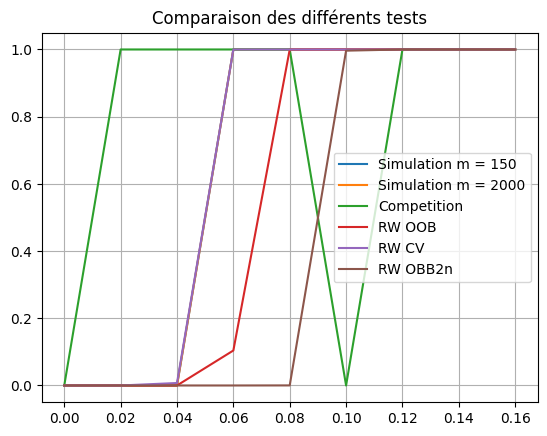

In [4]:
plt.figure
plt.title("Comparaison des différents tests")
plt.plot(beta2_values, power150, label = "Simulation m = 150")
plt.plot(beta2_values, power2000, label = "Simulation m = 2000")
plt.plot(beta2_values, powerC, label = "Competition")
plt.plot(beta2_values, power, label = "RW OOB")
plt.plot(beta2_values, power_CV, label = "RW CV")
plt.plot(beta2_values, power_OBB2n, label = "RW OBB2n")
plt.legend()
plt.grid()
plt.show()